# CATBOOST CLASSIFIER ALGORITHEM

In [25]:
# !pip install catboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ICU.csv')

del df['ID']
del df['gendera']
del df['group']

df.head()

,outcome,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,37.588179,0,0,0,1,1,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,NaN,0,0,0,0,1,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,26.572634,0,0,0,0,1,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,83.264629,0,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,31.824842,1,0,0,0,1,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [3]:
df.columns

Index(['outcome', 'age', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['outcome', 'age', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [6]:
df.tail()

,outcome,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1088,0.0,83,20.347657,1,1,0,0,0,0,0,...,137.800000,7.925000,102.400000,16.600000,2.250000,7.273333,23.000000,3.550,48.333333,55
1090,0.0,37,26.638051,0,0,0,0,0,0,0,...,135.666667,8.400000,100.333333,13.333333,2.050000,7.370000,26.333333,3.775,29.000000,20
1091,0.0,61,29.836962,1,0,0,1,0,0,1,...,135.444444,8.571429,99.444444,15.888889,1.900000,7.368125,24.333333,4.150,43.000000,20
1092,0.0,71,32.804298,1,0,0,1,0,1,0,...,141.823529,8.500000,101.470588,12.066667,2.005882,7.385806,32.933333,4.160,42.870968,55
1094,0.0,37,26.255155,0,0,0,0,0,0,0,...,126.230769,8.000000,92.923077,16.083333,2.141667,7.430000,21.666667,4.200,21.000000,15


In [7]:
x1 = df.drop(labels='outcome', axis=1)
y1 = df.loc[:,'outcome']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0.0: 363, 1.0: 65})
OVER SAMPLING DATA COUNT  :  Counter({0.0: 363, 1.0: 363})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  580
NUMBER OF TEST DATASET      :  146
TOTAL NUMBER OF DATASET    :  726


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  580
NUMBER OF TEST DATASET      :  146
TOTAL NUMBER OF DATASET    :  726


In [13]:
from catboost import CatBoostClassifier

In [14]:
CAT = CatBoostClassifier()
CAT.fit(x_train,y_train)

Learning rate set to 0.008164
0:	learn: 0.6867486	total: 159ms	remaining: 2m 38s
1:	learn: 0.6811809	total: 166ms	remaining: 1m 23s
2:	learn: 0.6759647	total: 174ms	remaining: 57.9s
3:	learn: 0.6706026	total: 185ms	remaining: 46s
4:	learn: 0.6640042	total: 197ms	remaining: 39.1s
5:	learn: 0.6580756	total: 208ms	remaining: 34.5s
6:	learn: 0.6525926	total: 218ms	remaining: 30.9s
7:	learn: 0.6484675	total: 227ms	remaining: 28.2s
8:	learn: 0.6434742	total: 238ms	remaining: 26.2s
9:	learn: 0.6364126	total: 257ms	remaining: 25.5s
10:	learn: 0.6306218	total: 264ms	remaining: 23.7s
11:	learn: 0.6241619	total: 270ms	remaining: 22.3s
12:	learn: 0.6178168	total: 277ms	remaining: 21s
13:	learn: 0.6142706	total: 283ms	remaining: 19.9s
14:	learn: 0.6095332	total: 290ms	remaining: 19.1s
15:	learn: 0.6032812	total: 296ms	remaining: 18.2s
16:	learn: 0.5978530	total: 303ms	remaining: 17.5s
17:	learn: 0.5924997	total: 309ms	remaining: 16.9s
18:	learn: 0.5886539	total: 316ms	remaining: 16.3s
19:	learn: 0.

In [15]:
predicted = CAT.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF CATBOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF CATBOOST CLASSIFIER:


 [[70  3]
 [ 0 73]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(CAT, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

Learning rate set to 0.008164
0:	learn: 0.6869981	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6804765	total: 18ms	remaining: 8.98s
2:	learn: 0.6755758	total: 25.1ms	remaining: 8.34s
3:	learn: 0.6701594	total: 31.8ms	remaining: 7.91s
4:	learn: 0.6641721	total: 39.8ms	remaining: 7.92s
5:	learn: 0.6581419	total: 46.1ms	remaining: 7.63s
6:	learn: 0.6513259	total: 54.4ms	remaining: 7.72s
7:	learn: 0.6458409	total: 60.8ms	remaining: 7.54s
8:	learn: 0.6416096	total: 67.7ms	remaining: 7.46s
9:	learn: 0.6347245	total: 74.9ms	remaining: 7.41s
10:	learn: 0.6292084	total: 81.2ms	remaining: 7.3s
11:	learn: 0.6239765	total: 88.9ms	remaining: 7.32s
12:	learn: 0.6189020	total: 95.1ms	remaining: 7.22s
13:	learn: 0.6145751	total: 103ms	remaining: 7.25s
14:	learn: 0.6102821	total: 109ms	remaining: 7.15s
15:	learn: 0.6046823	total: 115ms	remaining: 7.05s
16:	learn: 0.6001647	total: 121ms	remaining: 7.01s
17:	learn: 0.5954002	total: 127ms	remaining: 6.93s
18:	learn: 0.5899999	total: 134ms	remaining: 6.9s
19

In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF CATBOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF CATBOOST CLASSIFIER IS : 97.94520547945206


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF CATBOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF CATBOOST CLASSIFIER IS : 2.054794520547945


In [20]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print("THE PRECISION SCORE OF CATBOOST CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF CATBOOST CLASSIFIER IS : 96.05263157894737


In [21]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print("THE RECALL SCORE OF CATBOOST CLASSIFIER IS :",R*100)

THE RECALL SCORE OF CATBOOST CLASSIFIER IS : 100.0


In [22]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted)
print("THE PRECISION SCORE OF CATBOOST CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF CATBOOST CLASSIFIER IS : 97.98657718120806


THE CONFUSION MATRIX SCORE OF CATBOOST CLASSIFIER:


[[70  3]
 [ 0 73]]


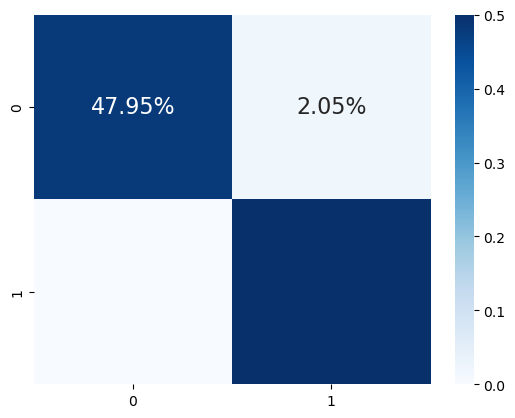

In [23]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF CATBOOST CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF CATBOOST CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

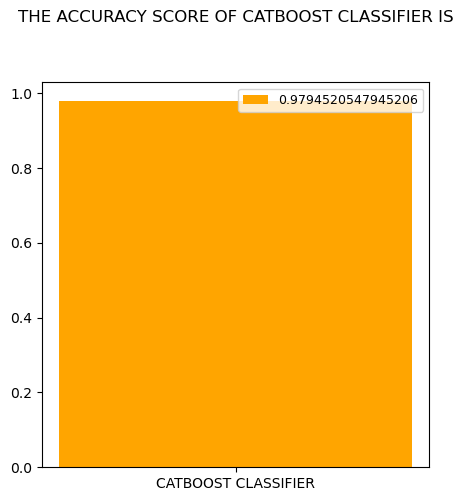

In [24]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="CATBOOST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("orange"))
    plt.title("THE ACCURACY SCORE OF CATBOOST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()